In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
import pandas as pd


In [31]:
base_dir = "FER2013"
train_dir = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\train")
test_dir = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\test")
print("train folder path", train_dir)
print("test folder path", test_dir)

train folder path C:\Users\avija\Downloads\FER2013\train
test folder path C:\Users\avija\Downloads\FER2013\test


In [32]:
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
print("classes are found:", classes)

classes are found: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [33]:
for c in classes:
    img_count = len(os.listdir(os.path.join(train_dir, c)))
    print(f"{c}: {img_count} images")

angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images


In [34]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=True,
    subset="training"
)

Found 22968 images belonging to 7 classes.


In [37]:
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=True,
    subset="validation"
)
    

Found 5741 images belonging to 7 classes.


In [38]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=False
)

Found 7178 images belonging to 7 classes.


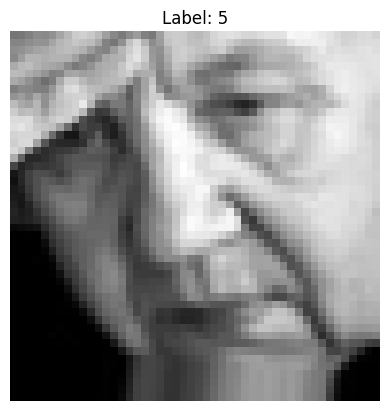

In [39]:
x_batch, y_batch = next(train_data)
plt.imshow(x_batch[0].reshape(48,48),cmap="gray")
plt.title(f"Label: {np.argmax(y_batch[0])}")
plt.axis("off")
plt.show()

In [40]:
base_dir = "FER2013"
music_csv = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\last.fm\Last.fm_data.csv")
print("File exists:", os.path.exists(music_csv))



File exists: True


In [41]:
music_df = pd.read_csv(music_csv)
print("Dataset loaded successfully!")
print("columns available:",music_df.columns)
print(music_df.head())


Dataset loaded successfully!
columns available: Index(['Unnamed: 0', 'Username', 'Artist', 'Track', 'Album', 'Date', 'Time'], dtype='object')
   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


In [42]:

music_df = music_df.drop(columns=['Unnamed: 0', 'username', 'date', 'time'], errors='ignore')

print(music_df.head())


  Username           Artist                          Track  \
0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1  Babs_05  Isobel Campbell                   Dusty Wreath   
2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


In [43]:
music_df = music_df.drop_duplicates(subset=['Track', 'Artist'])

print("Dataset shape after cleaning:", music_df.shape)


Dataset shape after cleaning: (76038, 6)


In [44]:
music_df['Track'] = music_df['Track'].str.lower().str.strip()
music_df['Artist'] = music_df['Artist'].str.lower().str.strip()


In [45]:
def map_emotion(track, artist):
    track = str(track).lower()
    artist = str(artist).lower()

    
    if "love" in track or "happy" in track or "dance" in track:
        return "happy"
    elif "sad" in track or "cry" in track or "lonely" in track:
        return "sad"
    elif "rock" in track or "metal" in artist or "angry" in track:
        return "angry"
    elif "calm" in track or "chill" in track or "instrumental" in track:
        return "neutral"
    else:
        return "neutral"  # default


music_df['emotion'] = music_df.apply(lambda x: map_emotion(x['Track'], x['Artist']), axis=1)

print(music_df[['Track', 'Artist', 'emotion']].head(10))


                               Track           Artist  emotion
0         the circus is leaving town  isobel campbell  neutral
1                       dusty wreath  isobel campbell  neutral
2         honey child what can i do?  isobel campbell  neutral
3      it's hard to kill a bad thing  isobel campbell  neutral
4                    saturday's gone  isobel campbell  neutral
5  (do you wanna) come walk with me?  isobel campbell  neutral
6                       ramblin' man  isobel campbell  neutral
7                           revolver  isobel campbell  neutral
8          ballad of the broken seas  isobel campbell  neutral
9                  the false husband  isobel campbell  neutral


In [46]:
import random

def recommend_songs(emotion, n=5):
    # Filter dataset on detected emotion
    filtered = music_df[music_df['emotion'] == emotion]

    if filtered.empty:
        return ["No songs found for this emotion."]


    return filtered.sample(n=min(n, len(filtered)))[['Track', 'Artist']]


In [47]:

detected_emotion = "happy"

print(f"🎵 Recommended Songs for Emotion: {detected_emotion}")
print(recommend_songs(detected_emotion, n=5))


🎵 Recommended Songs for Emotion: happy
                                 Track         Artist
118043        639 hz miracle love tone  miracle tones
80188                    songs of love      ben folds
106331                  the happy song    imogen heap
94384                           lovely  joey pecoraro
79206   love me do - mono / remastered    the beatles


In [51]:
import math
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

In [52]:
# Cell 2 - Change input_shape if needed (48,48,1 for FER-2013)
def build_cnn(input_shape=(48,48,1), n_classes=7):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Example build
cnn = build_cnn()
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,935 (2.61 MB)

 Trainable params: 684,231 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [54]:

print("Using generator path" if 'train_data' in globals() else "No train_data detected")
if 'train_data' in globals():
    train_classes = train_data.classes  # array of integer labels
    classes_unique = np.unique(train_classes)
    cw = compute_class_weight('balanced', classes=classes_unique, y=train_classes)
    class_weights = dict(zip(classes_unique, cw))
    print("Class weights:", class_weights)
else:
    class_weight = None


Using generator path
Class weights: {np.int32(0): np.float64(1.0266404434114071), np.int32(1): np.float64(9.401555464592715), np.int32(2): np.float64(1.0009587727708533), np.int32(3): np.float64(0.5684585684585685), np.int32(4): np.float64(0.826068191627104), np.int32(5): np.float64(0.8491570541259982), np.int32(6): np.float64(1.2933160650937552)}


In [58]:

es = callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
mc_path = "fer_cnn_best.keras"
mc = callbacks.ModelCheckpoint(mc_path, monitor='val_loss', save_best_only=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

EPOCHS = 40
BATCH_SIZE = 64

In [59]:
if 'train_data' in globals():
    model = build_cnn(input_shape=(48,48,1), n_classes=train_data.num_classes)

    steps_per_epoch = math.ceil(train_data.n / train_data.batch_size)
    validation_steps = math.ceil(val_data.n / val_data.batch_size)


In [60]:
history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,
    validation_steps=validation_steps,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=[es, mc ,rlr],
    verbose=1
)

Epoch 1/40


C:\Users\avija\Downloads\FER2013\tfvenv1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.1902 - loss: 2.2616 - val_accuracy: 0.2404 - val_loss: 1.8857 - learning_rate: 0.0010
Epoch 2/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.2503 - loss: 1.8858 - val_accuracy: 0.2656 - val_loss: 1.8041 - learning_rate: 0.0010
Epoch 3/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.2974 - loss: 1.7630 - val_accuracy: 0.3510 - val_loss: 1.6855 - learning_rate: 0.0010
Epoch 4/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.3403 - loss: 1.6774 - val_accuracy: 0.2829 - val_loss: 1.8526 - learning_rate: 0.0010
Epoch 5/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.3546 - loss: 1.6412 - val_accuracy: 0.3395 - val_loss: 1.7193 - learning_rate: 0.0010
Epoch 6/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.3759 - loss: 1.6078 - val_accuracy: 0.4135 - val_loss: 1.5359 - learning_rate: 0.0010
Epoch 7/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.3872 - loss:

In [65]:

if os.path.exists(mc_path):
    model.load_weights(mc_path)

# Evaluate
if 'X_test' in globals():
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test loss: {loss:.4f}, Test acc: {acc:.4f}")
elif 'test_data' in globals():
    test_steps = math.ceil(test_data.n / test_data.batch_size)
    loss, acc = model.evaluate(test_data, steps=test_steps, verbose=1)
    print(f"Test loss: {loss:.4f}, Test acc: {acc:.4f}")




113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5515 - loss: 1.1798
Test loss: 1.1798, Test acc: 0.5515


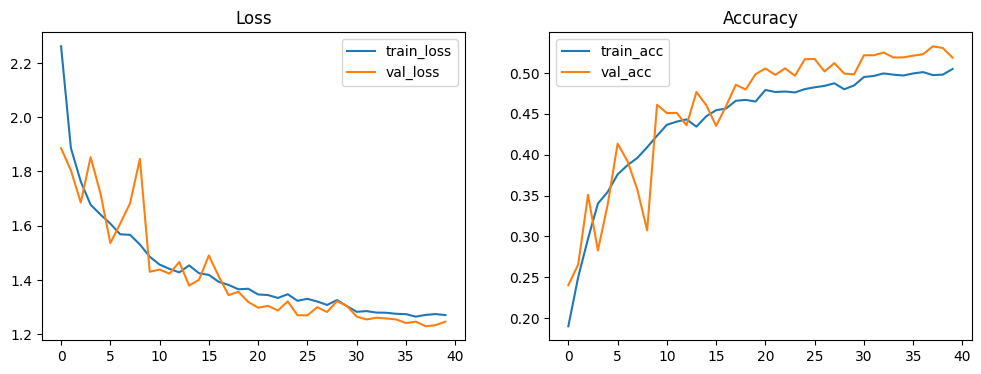

In [73]:
if 'history' in globals():
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],label='train_loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.legend();plt.title("Loss")
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],label='train_acc')
    plt.plot(history.history['val_accuracy'],label='val_acc')
    plt.legend();plt.title("Accuracy")
    plt.show()

In [75]:

emotion_map = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'sad',5:'surprise',6:'neutral'}

predictions = []
if 'test_data' in globals():
    
    test_steps = math.ceil(test_data.n / test_data.batch_size)
    probs = model.predict(test_data, steps=test_steps, verbose=1)
    preds = np.argmax(probs, axis=1)
    filenames = test_data.filenames  # relative paths from test_dir
    
    for fname, p, prob in zip(filenames, preds, probs):
        predictions.append({
            'filename': fname,
            'predicted_label': int(p),
            'predicted_emotion': emotion_map[int(p)],
            'probabilities': prob.tolist()
        })

elif 'X_test' in globals():
    probs = model.predict(X_test, verbose=1)
    preds = np.argmax(probs, axis=1)
    for i, (p, prob) in enumerate(zip(preds, probs)):
        predictions.append({
            'index': i,
            'predicted_label': int(p),
            'predicted_emotion': emotion_map[int(p)],
            'probabilities': prob.tolist()
        })


pred_df = pd.DataFrame(predictions)
pred_df.to_csv("fer_test_predictions.csv", index=False)
print("Saved predictions to fer_test_predictions.csv")


model.save("fer_cnn_full_model.keras")
print("Saved model to fer_cnn_full_model.keras")


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
Saved predictions to fer_test_predictions.csv
Saved model to fer_cnn_full_model.keras


In [79]:

preds = pd.read_csv("fer_test_predictions.csv")
sample = preds.iloc[0]
emotion = sample['predicted_emotion']


print(recommend_songs(emotion, n=5))

                                                  Track           Artist
6801                                            rock on           t. rex
19286   i wanna rock you - marat taturas kazachok remix  giorgio moroder
104715                                       black rock        the roots
160611                      punkrocker (feat. iggy pop)       teddybears
165771                            the rocks & the water    mark knopfler
